# 线性回归

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

## 一元线性回归模型

### 线性变化的数据

检查 1965~2021 年的能源消耗增长，发现了什么？

Text(0, 0.5, 'primary energy consumption')

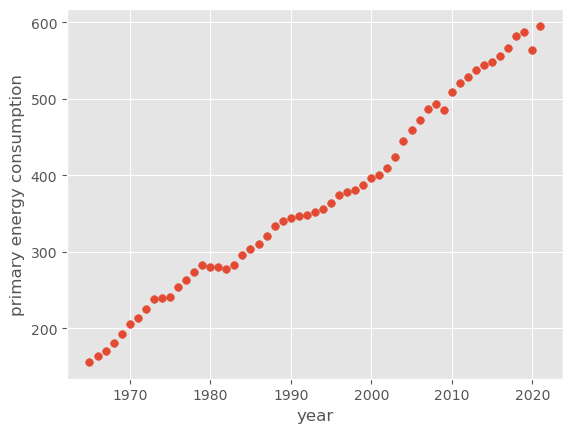

In [3]:
data = pd.read_csv('dataset/primary-energy-consumption.csv')
x = data['year']
y = data['consumption']

plt.scatter(x, y, s=30)
plt.xlabel('year')
plt.ylabel('primary energy consumption')

数据变化规律大致呈一条直线！

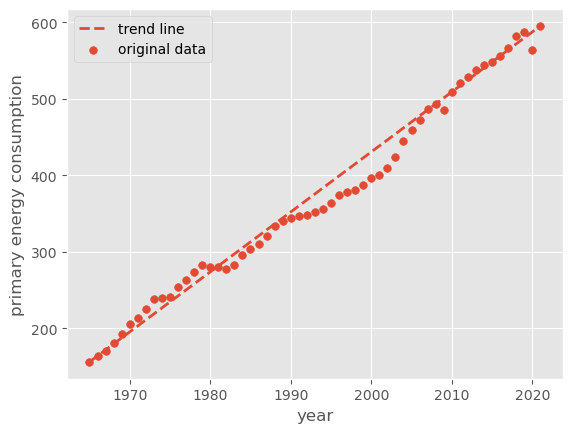

In [4]:
plt.plot(x.iloc[[0, -1]], y.iloc[[0, -1]], '--', linewidth=2, label='trend line'),
plt.scatter(x, y, s=30, label='original data')
plt.xlabel('year')
plt.ylabel('primary energy consumption')
plt.legend()

### 使用 Scikit-Learn 搭建线性回归模型

0. 正确处理原始数据

In [5]:
X = x.values.reshape(-1, 1)
X[0]

array([1965], dtype=int64)

1. 导入必要的模型类

In [6]:
from sklearn.linear_model import LinearRegression

2. 实例化模型类并调整超参数

In [7]:
model = LinearRegression(fit_intercept=True)

3. 使用 `.fit(X, y)` 方法应用于数据集

In [8]:
model.fit(X, y)

LinearRegression()

4. 获取计算后的模型参数

In [9]:
model.coef_

array([7.57467915])

In [10]:
model.intercept_

-14726.826081799325

5. 将模型应用到其它数据，实现预测

In [11]:
model.predict([[2030], [2050], [2100]])

array([ 649.77260241,  801.26618551, 1180.00014325])

趋势线的可视化

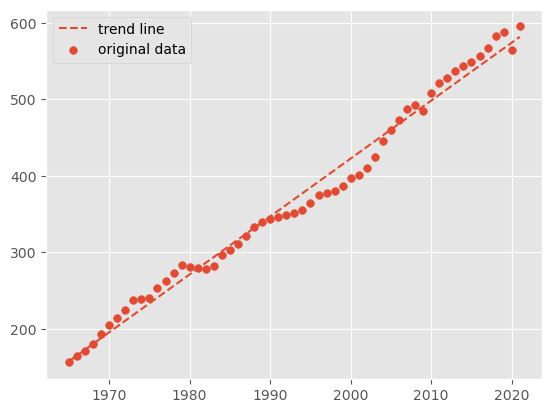

In [12]:
X_fit = np.linspace(1965, 2021, 2).reshape((-1, 1))
y_fit = model.predict(X_fit)

plt.plot(X_fit, y_fit, '--', label='trend line')
plt.scatter(x, y, s=30, label='original data')
plt.legend()

### 线性回归的数学原理

残差

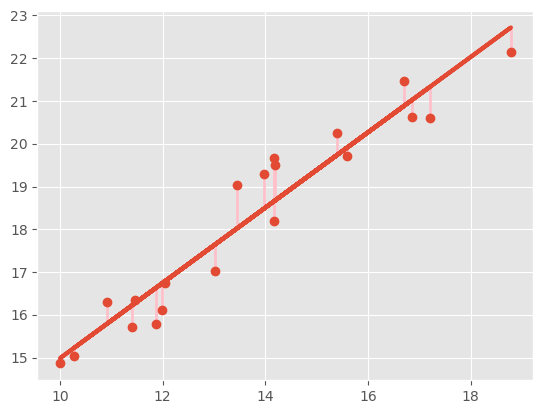

In [13]:
rand = np.random.RandomState(1)
x = 10 * rand.rand(20) + 10
X = x.reshape(-1, 1)
y = 0.9 * x + 6 + rand.randn(20) * 0.8

model = LinearRegression().fit(X, y)

y_pred = model.intercept_ + model.coef_ * x

def plot_yerr(y, y_pred):
    yerr_upper = np.zeros_like(y, dtype=np.float_)
    yerr_upper[(y_pred - y) > 0] = (y - y_pred)[(y_pred - y) > 0]

    yerr_lower = np.zeros_like(y, dtype=np.float_)
    yerr_lower[(y_pred - y) < 0] = (y_pred - y)[(y_pred - y) < 0]

    plt.errorbar(x, y_pred, yerr=[yerr_lower, yerr_upper],
                linewidth=3, ecolor='pink', elinewidth=2)
    plt.plot(x, y, 'o')

plot_yerr(y, y_pred)

残差平方和

In [14]:
np.sum((y - y_pred) ** 2)

7.213867209045556

不好的趋势线，它的残差平方和更大

10.178274602459332

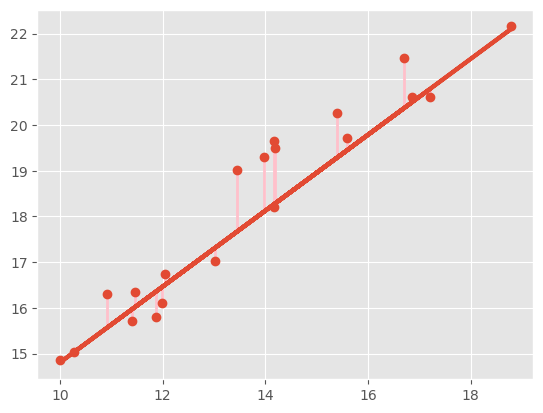

In [15]:
y_bad_pred = 6.5 + (y.max() - y.min()) / (x.max() - x.min()) * x

plot_yerr(y, y_bad_pred)

np.sum((y - y_bad_pred) ** 2)

### 模型评价

可以建立线性回归模型吗？

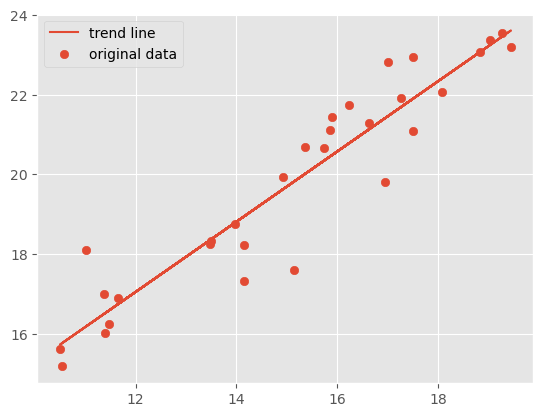

In [16]:
_x = 10 * rand.rand(30) + 10
_y = 0.9 * _x + 6 + rand.randn(30)

model = LinearRegression()
model.fit(_x.reshape(-1, 1), _y)

plt.scatter(_x, _y, label='original data')
plt.plot(_x, model.predict(_x.reshape(-1, 1)), label='trend line')
plt.legend()

使用 Statsmodels 工具包分析统计模型

In [17]:
x = data['year']
y = data['consumption']

In [18]:
import statsmodels.api as sm
est = sm.OLS(y, sm.add_constant(x)).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     3962.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           6.12e-53
Time:                        21:30:09   Log-Likelihood:                -234.02
No. Observations:                  57   AIC:                             472.0
Df Residuals:                      55   BIC:                             476.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.473e+04    239.859    -61.398      0.000   -1.52e+04   -1.42e+04
year           7.5747      0.120     62.941      0.000       7.333       7.816
==============================================================================
Omnibus:                        6.517   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                3.783
Skew:                          -0.436   Prob(JB):                        0.151
Kurtosis:                       2.087   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 线性回归的拓展

### 多元线性回归

In [19]:
data = pd.read_csv('dataset/profit-depend-on.csv')
X_mul, y_mul = data.drop(columns=['Profit']), data['Profit']

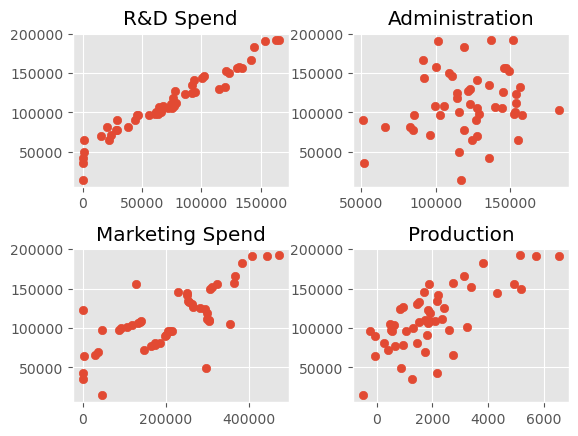

In [20]:
plt.subplots_adjust(hspace=0.4, wspace=0.3)
for i, f in enumerate(X_mul.columns):
    plt.subplot(2, 2, i + 1)
    plt.scatter(X_mul[f], y_mul)
    plt.title(f)

分析多元回归的数据

In [21]:
sm.OLS(y_mul, sm.add_constant(X_mul)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     222.3
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           5.15e-29
Time:                        21:30:09   Log-Likelihood:                -524.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      45   BIC:                             1069.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.009e+04   6571.034      7.622      0.000    3.69e+04    6.33e+04
R&D Spend           0.7762      0.054     14.442      0.000       0.668       0.885
Administration     -0.0280      0.051     -0.548      0.586      -0.131       0.075
Marketing Spend     0.0270      0.016      1.639      0.108      -0.006       0.060
Production          1.2157      1.204      1.010      0.318      -1.209       3.641
==============================================================================
Omnibus:                       12.807   Durbin-Watson:                   1.342
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.184
Skew:                          -0.846   Prob(JB):                     0.000186
Kurtosis:                       5.321   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

根据结果酌情删去几个特征变量

In [22]:
sm.OLS(y_mul, sm.add_constant(data[['R&D Spend', 'Marketing Spend']])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           2.16e-31
Time:                        21:30:09   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
R&D Spend           0.7966      0.041     19.266      0.000       0.713       0.880
Marketing Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

一种依靠数学方程可以直接得出结果的方法：

<!-- 然并卵，时间复杂度太高了，<span class="math">\\( O(N^{2.4}) \\)</span> 到 <span class="math">\\( O(N^3) \\)</span> -->

In [23]:
X = 10 * rand.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

In [24]:
X_b = np.c_[np.ones((100, 1)), X]   # add x0 = 1 to each instance
k_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
k_best

array([ 0.5,  1.5, -2. ,  1. ])

使用最小二乘法得出结果

In [25]:
k_best, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [26]:
k_best

array([ 0.5,  1.5, -2. ,  1. ])

通过 Scikit-Learn 搭建多元回归模型

In [27]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [28]:
model.intercept_

0.49999999999999734

In [29]:
model.coef_

array([ 1.5, -2. ,  1. ])

### 多项式回归

曲线形式的数据

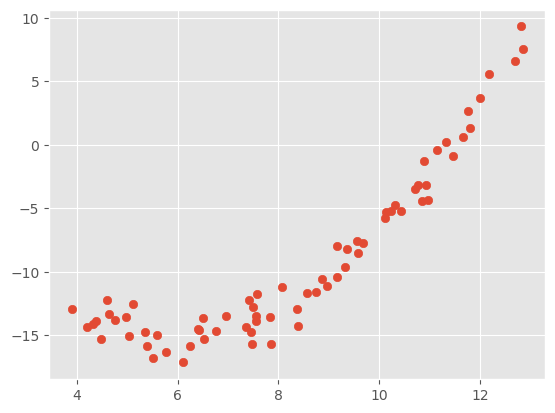

In [30]:
X = np.linspace(3.5, 12, 70).reshape(-1, 1) + rand.rand(70, 1)
y = 0.5 * X ** 2 - 6 * X + 3 + rand.randn(70, 1)

plt.scatter(X, y)

不能用直线拟合

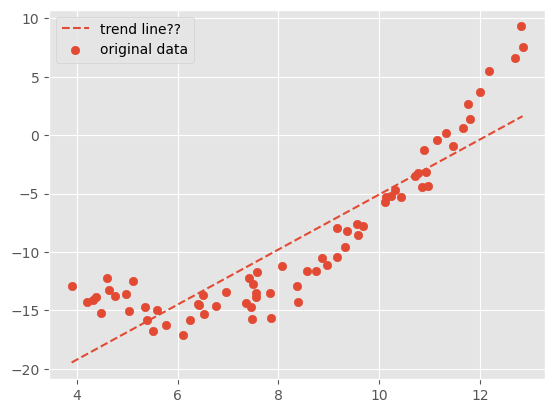

In [31]:
bad_model = LinearRegression()
bad_model.fit(X, y)

plt.scatter(X, y, label='original data')
plt.plot(X[[0, -1]], bad_model.predict(X)[[0, -1]], '--', label='trend line??')
plt.legend()

通过 `PolynomialFeatures` 预处理工具变换为各次项的多元回归模型

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_poly[0]

array([ 1.        ,  3.89485048, 15.16986027])

应用于线性回归模型中

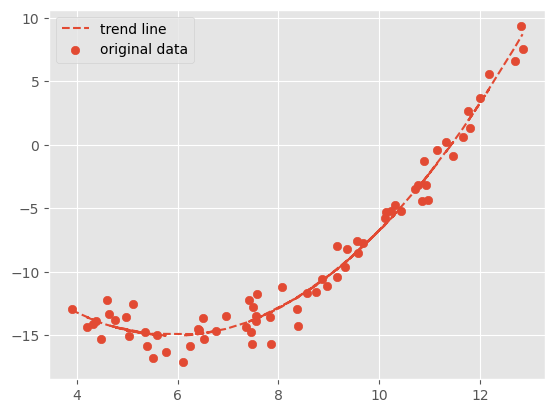

In [33]:
good_model = LinearRegression()
good_model.fit(X_poly, y)

plt.scatter(X, y, label='original data')
plt.plot(X, good_model.predict(X_poly), '--', label='trend line')
plt.legend()

使用管道运算组合预处理与建立模型

In [34]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(3), 
                      LinearRegression())
model.fit(X, y)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

### 正则化回归模型

高次曲线的回归模型

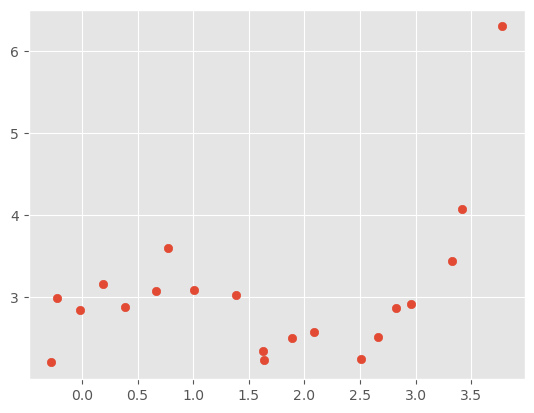

In [35]:
X = np.linspace(-0.5, 3.5, 20).reshape(-1, 1) + rand.rand(20, 1) * 0.3
y = 0.5 * X ** 3 - 2.2 * X ** 2 + 2 * X + 3 + rand.randn(20, 1) * 0.3

plt.scatter(X[:, 0], y)

标准的回归拟合结果

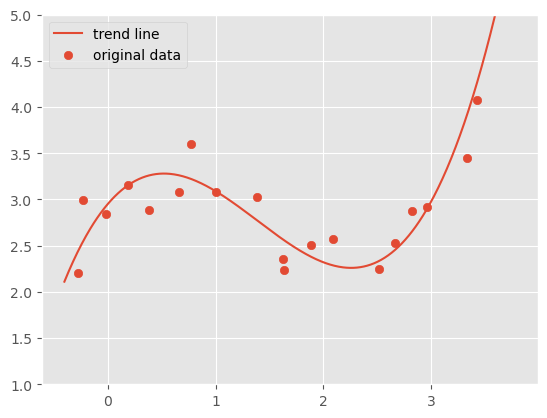

In [36]:

good_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
good_model.fit(X, y)

__x = np.linspace(-0.4, 3.6, 500)

plt.scatter(X, y, label='original data')
plt.plot(__x, good_model.predict(__x.reshape(-1, 1)), label='trend line')
plt.ylim(1, 5)
plt.legend()

错误的拟合结果：过高次项的过拟合

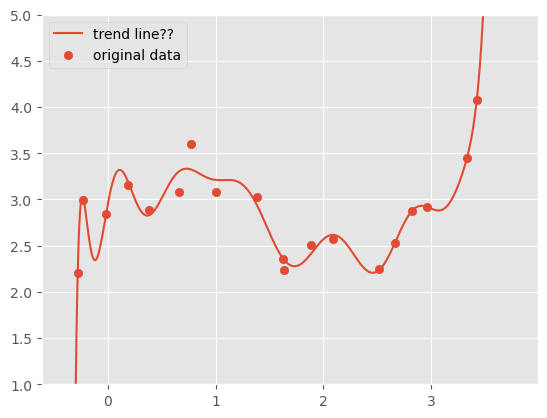

In [37]:
bad_model = make_pipeline(PolynomialFeatures(degree=16), LinearRegression())
bad_model.fit(X, y)

plt.scatter(X, y, label='original data')
plt.plot(__x, bad_model.predict(__x.reshape(-1, 1)), label='trend line??')
plt.ylim(1, 5)
plt.legend()

`Ridge` ：带有约束条件的岭回归

e:\workspace\ai\env\sci\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.86695e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


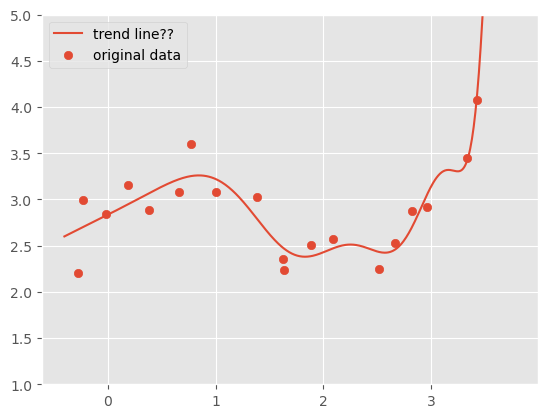

In [38]:
from sklearn.linear_model import Ridge

X_poly = PolynomialFeatures(degree=16).fit_transform(X)
__x_poly = PolynomialFeatures(degree=16).fit_transform(__x.reshape(-1, 1))

model = Ridge(alpha=0.2)
model.fit(X_poly, y)

plt.scatter(X, y, label='original data')
plt.plot(__x, model.predict(__x_poly), label='trend line??')
plt.ylim(1, 5)
plt.legend()

`Ridge` 正则化回归与 `Lasso` 正则化回归的区别

e:\workspace\ai\env\sci\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.58321e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
e:\workspace\ai\env\sci\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.58321e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
e:\workspace\ai\env\sci\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.36825e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
e:\workspace\ai\env\sci\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.58321e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


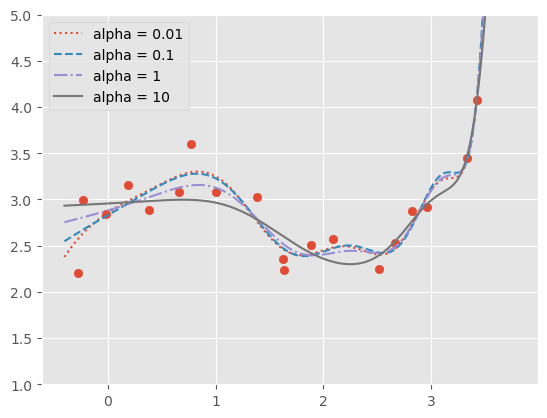

In [39]:
plt.scatter(X, y)
for alpha, linestyle in zip([0.01, 0.1, 1, 10], [':', '--', '-.', '-']):
    model = make_pipeline(PolynomialFeatures(16),
                        Ridge(alpha=alpha))
    model.fit(X, y)

    plt.plot(__x, model.predict((__x.reshape(-1, 1))), linestyle, label=f'alpha = {alpha}')

plt.ylim(1, 5)
plt.legend()

e:\workspace\ai\env\sci\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.182e-01, tolerance: 1.551e-03
  model = cd_fast.enet_coordinate_descent(
e:\workspace\ai\env\sci\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.979e-01, tolerance: 1.551e-03
  model = cd_fast.enet_coordinate_descent(
e:\workspace\ai\env\sci\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.155e+00, tolerance: 

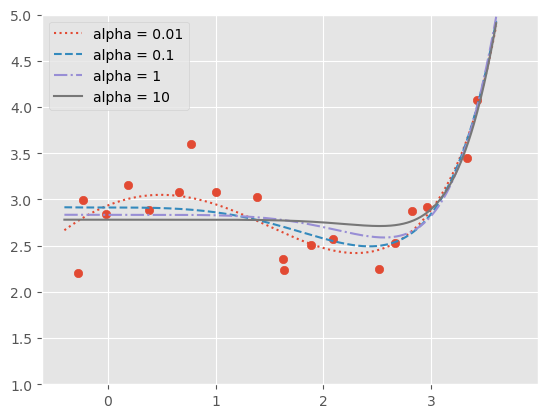

In [40]:
from sklearn.linear_model import Lasso

plt.scatter(X, y)
for alpha, linestyle in zip([0.01, 0.1, 1, 10], [':', '--', '-.', '-']):
    model = make_pipeline(PolynomialFeatures(16),
                          Lasso(alpha=alpha))
    model.fit(X, y)

    plt.plot(__x, model.predict((__x.reshape(-1, 1))), linestyle, label=f'alpha = {alpha}')

plt.ylim(1, 5)
plt.legend()